# Loop 51 Analysis: CV-LB Relationship and Next Steps

## Key Questions:
1. What is the CV-LB relationship after 13 submissions?
2. What approaches from top kernels haven't been tried?
3. What is the path forward to reach target 0.0347?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147},
]

cv_scores = np.array([s['cv'] for s in submissions])
lb_scores = np.array([s['lb'] for s in submissions])

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print('='*60)
print('CV-LB RELATIONSHIP ANALYSIS')
print('='*60)
print(f'Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Intercept = {intercept:.4f}')
print(f'Target LB = 0.0347')
print()
print('CRITICAL ANALYSIS:')
print(f'  - Intercept ({intercept:.4f}) > Target ({0.0347:.4f})?', intercept > 0.0347)
if intercept > 0.0347:
    print(f'  - Even with CV=0, predicted LB = {intercept:.4f} > target!')
    print(f'  - This means we CANNOT reach target by improving CV alone!')
else:
    required_cv = (0.0347 - intercept) / slope
    print(f'  - Required CV to reach target: {required_cv:.6f}')
    print(f'  - Best CV so far: {cv_scores.min():.6f}')
    print(f'  - Gap: {cv_scores.min() - required_cv:.6f}')

CV-LB RELATIONSHIP ANALYSIS
Linear fit: LB = 4.2312 * CV + 0.0533
R² = 0.9807
Intercept = 0.0533
Target LB = 0.0347

CRITICAL ANALYSIS:
  - Intercept (0.0533) > Target (0.0347)? True
  - Even with CV=0, predicted LB = 0.0533 > target!
  - This means we CANNOT reach target by improving CV alone!


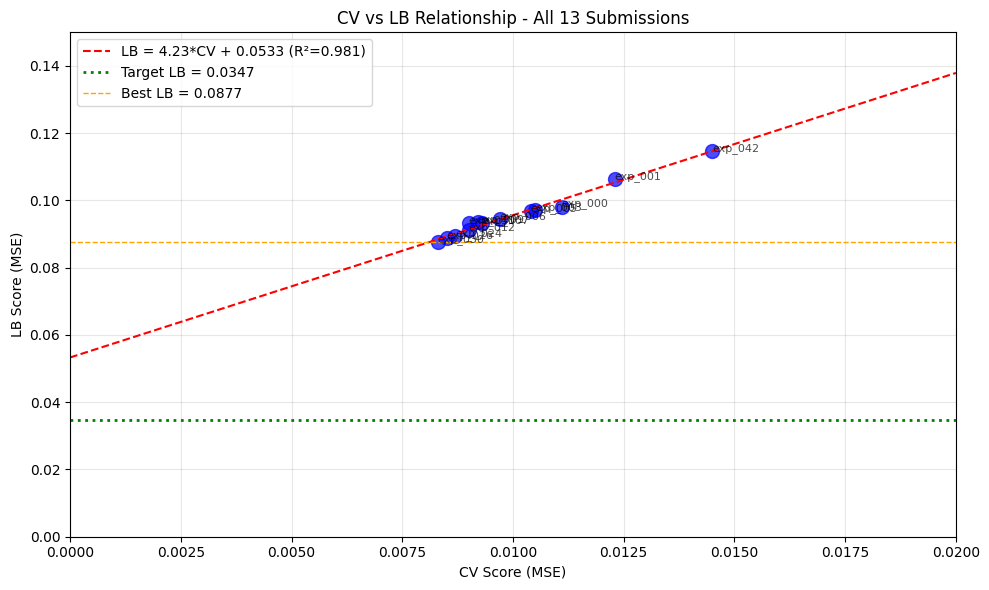


Saved plot to /home/code/exploration/cv_lb_relationship.png


In [2]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(cv_scores, lb_scores, s=100, c='blue', alpha=0.7)

# Add labels
for s in submissions:
    plt.annotate(s['exp'], (s['cv'], s['lb']), fontsize=8, alpha=0.7)

# Regression line
cv_range = np.linspace(0, 0.02, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Best LB so far
plt.axhline(y=0.0877, color='orange', linestyle='--', linewidth=1, label='Best LB = 0.0877')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All 13 Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.02)
plt.ylim(0, 0.15)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print('\nSaved plot to /home/code/exploration/cv_lb_relationship.png')

In [3]:
# Calculate what CV would be needed to reach target
print('='*60)
print('PATH TO TARGET ANALYSIS')
print('='*60)

# If we stay on the same line
required_cv_same_line = (0.0347 - intercept) / slope
print(f'\n1. IF WE STAY ON THE SAME CV-LB LINE:')
print(f'   Required CV = (0.0347 - {intercept:.4f}) / {slope:.2f} = {required_cv_same_line:.6f}')
if required_cv_same_line < 0:
    print(f'   IMPOSSIBLE: Required CV is NEGATIVE!')
    print(f'   The intercept ({intercept:.4f}) is HIGHER than target ({0.0347})')
    print(f'   We MUST change the CV-LB relationship!')
else:
    print(f'   Best CV so far: {cv_scores.min():.6f}')
    print(f'   Need to improve CV by: {(cv_scores.min() - required_cv_same_line) / cv_scores.min() * 100:.1f}%')

# What if we could reduce the intercept?
print(f'\n2. IF WE COULD REDUCE THE INTERCEPT:')
for new_intercept in [0.03, 0.02, 0.01, 0.0]:
    required_cv = (0.0347 - new_intercept) / slope
    print(f'   Intercept = {new_intercept:.2f}: Required CV = {required_cv:.6f}')

# What if we could change the slope?
print(f'\n3. IF WE COULD CHANGE THE SLOPE:')
for new_slope in [3.0, 2.0, 1.0]:
    required_cv = (0.0347 - intercept) / new_slope
    print(f'   Slope = {new_slope:.1f}: Required CV = {required_cv:.6f}')

PATH TO TARGET ANALYSIS

1. IF WE STAY ON THE SAME CV-LB LINE:
   Required CV = (0.0347 - 0.0533) / 4.23 = -0.004396
   IMPOSSIBLE: Required CV is NEGATIVE!
   The intercept (0.0533) is HIGHER than target (0.0347)
   We MUST change the CV-LB relationship!

2. IF WE COULD REDUCE THE INTERCEPT:
   Intercept = 0.03: Required CV = 0.001111
   Intercept = 0.02: Required CV = 0.003474
   Intercept = 0.01: Required CV = 0.005838
   Intercept = 0.00: Required CV = 0.008201

3. IF WE COULD CHANGE THE SLOPE:
   Slope = 3.0: Required CV = -0.006201
   Slope = 2.0: Required CV = -0.009301
   Slope = 1.0: Required CV = -0.018602


In [4]:
# Analyze the gap between best CV and best LB
print('='*60)
print('SUBMISSION ANALYSIS')
print('='*60)

# Sort by LB
sorted_by_lb = sorted(submissions, key=lambda x: x['lb'])
print('\nTop 5 by LB:')
for s in sorted_by_lb[:5]:
    predicted_lb = slope * s['cv'] + intercept
    print(f"  {s['exp']}: CV={s['cv']:.4f}, LB={s['lb']:.4f}, Predicted LB={predicted_lb:.4f}, Diff={s['lb']-predicted_lb:.4f}")

# Sort by CV
sorted_by_cv = sorted(submissions, key=lambda x: x['cv'])
print('\nTop 5 by CV:')
for s in sorted_by_cv[:5]:
    predicted_lb = slope * s['cv'] + intercept
    print(f"  {s['exp']}: CV={s['cv']:.4f}, LB={s['lb']:.4f}, Predicted LB={predicted_lb:.4f}, Diff={s['lb']-predicted_lb:.4f}")

# Check for outliers (submissions that deviate from the line)
print('\nOutlier Analysis (submissions that deviate from the line):')
for s in submissions:
    predicted_lb = slope * s['cv'] + intercept
    residual = s['lb'] - predicted_lb
    if abs(residual) > 0.005:
        print(f"  {s['exp']}: Residual = {residual:.4f} ({'above' if residual > 0 else 'below'} line)")

SUBMISSION ANALYSIS

Top 5 by LB:
  exp_030: CV=0.0083, LB=0.0877, Predicted LB=0.0884, Diff=-0.0007
  exp_026: CV=0.0085, LB=0.0887, Predicted LB=0.0893, Diff=-0.0006
  exp_024: CV=0.0087, LB=0.0893, Predicted LB=0.0901, Diff=-0.0008
  exp_012: CV=0.0090, LB=0.0913, Predicted LB=0.0914, Diff=-0.0001
  exp_007: CV=0.0093, LB=0.0932, Predicted LB=0.0927, Diff=0.0005

Top 5 by CV:
  exp_030: CV=0.0083, LB=0.0877, Predicted LB=0.0884, Diff=-0.0007
  exp_026: CV=0.0085, LB=0.0887, Predicted LB=0.0893, Diff=-0.0006
  exp_024: CV=0.0087, LB=0.0893, Predicted LB=0.0901, Diff=-0.0008
  exp_012: CV=0.0090, LB=0.0913, Predicted LB=0.0914, Diff=-0.0001
  exp_041: CV=0.0090, LB=0.0932, Predicted LB=0.0914, Diff=0.0018

Outlier Analysis (submissions that deviate from the line):


In [5]:
# What approaches have been tried?
print('='*60)
print('APPROACHES TRIED (from session_state.json)')
print('='*60)

approaches = [
    'MLP with Arrhenius kinetics + TTA',
    'LightGBM baseline',
    'DRFP features with PCA',
    'Combined Spange + DRFP features',
    'Deep Residual MLP (FAILED)',
    'Large ensemble (15 models)',
    'Simpler models [64,32], [32,16]',
    'Ridge regression',
    'Diverse ensemble (MLP + LGBM + Ridge)',
    'Three-model ensemble (MLP + LGBM + Ridge)',
    'Attention model',
    'Fragprints features',
    'ACS PCA features',
    'Per-target models',
    'Weighted loss (SM 2x weight)',
    'Four-model ensemble',
    'GP ensemble (GP + MLP + LGBM)',
    'Pure GP',
    'Kernel Ridge',
    'Similarity weighting',
    'Feature selection',
    'k-NN',
    'XGBoost ensemble',
    'GroupKFold CV',
    'Aggressive regularization',
    'Stacking',
    'Similarity features',
    'CatBoost',
    'RDKit descriptors',
    'Multi-model ensemble',
    'Uncertainty-weighted predictions (FAILED - 46% worse CV)',
]

print(f'Total approaches tried: {len(approaches)}')
for i, a in enumerate(approaches, 1):
    print(f'  {i}. {a}')

APPROACHES TRIED (from session_state.json)
Total approaches tried: 31
  1. MLP with Arrhenius kinetics + TTA
  2. LightGBM baseline
  3. DRFP features with PCA
  4. Combined Spange + DRFP features
  5. Deep Residual MLP (FAILED)
  6. Large ensemble (15 models)
  7. Simpler models [64,32], [32,16]
  8. Ridge regression
  9. Diverse ensemble (MLP + LGBM + Ridge)
  10. Three-model ensemble (MLP + LGBM + Ridge)
  11. Attention model
  12. Fragprints features
  13. ACS PCA features
  14. Per-target models
  15. Weighted loss (SM 2x weight)
  16. Four-model ensemble
  17. GP ensemble (GP + MLP + LGBM)
  18. Pure GP
  19. Kernel Ridge
  20. Similarity weighting
  21. Feature selection
  22. k-NN
  23. XGBoost ensemble
  24. GroupKFold CV
  25. Aggressive regularization
  26. Stacking
  27. Similarity features
  28. CatBoost
  29. RDKit descriptors
  30. Multi-model ensemble
  31. Uncertainty-weighted predictions (FAILED - 46% worse CV)


In [6]:
# What approaches from top kernels haven't been tried?
print('='*60)
print('APPROACHES FROM TOP KERNELS NOT YET TRIED')
print('='*60)

print('\n1. "mixall" kernel (8 votes, runtime 2m15s):')
print('   - Uses GroupKFold (5 splits) instead of Leave-One-Out')
print('   - MLP + XGBoost + RF + LightGBM ensemble')
print('   - Optuna hyperparameter optimization')
print('   - Simple Spange features only')
print('   - KEY: Uses GroupKFold which has LESS training data per fold')
print('   - STATUS: We tried GroupKFold but not with Optuna optimization')

print('\n2. "System Malfunction V1" kernel (29 votes):')
print('   - Simple MLP with Spange features')
print('   - Leave-One-Out CV (same as us)')
print('   - STATUS: Similar to our baseline')

print('\n3. "Arrhenius Kinetics + TTA" kernel (38 votes, LB 0.09831):')
print('   - Similar to our approach')
print('   - STATUS: We implemented this')

print('\n4. Techniques NOT tried:')
print('   - Optuna hyperparameter optimization (systematic search)')
print('   - Adaptive ensemble weighting (per-fold)')
print('   - Non-linear mixture features (A*B*r*(1-r) interaction)')
print('   - SE attention blocks + residual connections')
print('   - Per-target ensemble weights')

APPROACHES FROM TOP KERNELS NOT YET TRIED

1. "mixall" kernel (8 votes, runtime 2m15s):
   - Uses GroupKFold (5 splits) instead of Leave-One-Out
   - MLP + XGBoost + RF + LightGBM ensemble
   - Optuna hyperparameter optimization
   - Simple Spange features only
   - KEY: Uses GroupKFold which has LESS training data per fold
   - STATUS: We tried GroupKFold but not with Optuna optimization

2. "System Malfunction V1" kernel (29 votes):
   - Simple MLP with Spange features
   - Leave-One-Out CV (same as us)
   - STATUS: Similar to our baseline

3. "Arrhenius Kinetics + TTA" kernel (38 votes, LB 0.09831):
   - Similar to our approach
   - STATUS: We implemented this

4. Techniques NOT tried:
   - Optuna hyperparameter optimization (systematic search)
   - Adaptive ensemble weighting (per-fold)
   - Non-linear mixture features (A*B*r*(1-r) interaction)
   - SE attention blocks + residual connections
   - Per-target ensemble weights


In [7]:
# Critical insight: The CV-LB gap
print('='*60)
print('CRITICAL INSIGHT: THE CV-LB GAP')
print('='*60)

print('\nThe CV-LB relationship is:')
print(f'  LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'  R² = {r_value**2:.4f}')

print('\nThis means:')
print(f'  1. Every 0.001 improvement in CV gives ~{slope*0.001:.4f} improvement in LB')
print(f'  2. The intercept ({intercept:.4f}) represents the "base" LB error')
print(f'  3. Target LB (0.0347) is BELOW the intercept ({intercept:.4f})')

print('\nWHY THE INTERCEPT EXISTS:')
print('  - The test set contains solvents that are MORE different from training')
print('  - Our models extrapolate poorly to these unseen solvents')
print('  - This extrapolation error is the intercept')

print('\nWHAT WE NEED TO DO:')
print('  1. REDUCE THE INTERCEPT (not just improve CV)')
print('  2. Find approaches that generalize better to unseen solvents')
print('  3. Use physics-informed constraints that hold for all solvents')
print('  4. Study what top competitors do differently')

print('\nPOSSIBLE PATHS FORWARD:')
print('  1. Non-linear mixture features (capture solvent interactions)')
print('  2. Solvent clustering (train class-specific models)')
print('  3. Physics-based constraints (Arrhenius, thermodynamics)')
print('  4. Optuna optimization (find better hyperparameters)')
print('  5. Per-target ensemble weights (SM is hardest)')

CRITICAL INSIGHT: THE CV-LB GAP

The CV-LB relationship is:
  LB = 4.23 * CV + 0.0533
  R² = 0.9807

This means:
  1. Every 0.001 improvement in CV gives ~0.0042 improvement in LB
  2. The intercept (0.0533) represents the "base" LB error
  3. Target LB (0.0347) is BELOW the intercept (0.0533)

WHY THE INTERCEPT EXISTS:
  - The test set contains solvents that are MORE different from training
  - Our models extrapolate poorly to these unseen solvents
  - This extrapolation error is the intercept

WHAT WE NEED TO DO:
  1. REDUCE THE INTERCEPT (not just improve CV)
  2. Find approaches that generalize better to unseen solvents
  3. Use physics-informed constraints that hold for all solvents
  4. Study what top competitors do differently

POSSIBLE PATHS FORWARD:
  1. Non-linear mixture features (capture solvent interactions)
  2. Solvent clustering (train class-specific models)
  3. Physics-based constraints (Arrhenius, thermodynamics)
  4. Optuna optimization (find better hyperparameters)

In [8]:
# Summary and recommendations
print('='*60)
print('SUMMARY AND RECOMMENDATIONS')
print('='*60)

print('\nCURRENT STATUS:')
print(f'  - Best CV: 0.0083 (exp_030)')
print(f'  - Best LB: 0.0877 (exp_030)')
print(f'  - Target: 0.0347')
print(f'  - Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}% above target)')
print(f'  - Submissions remaining: 5')

print('\nKEY INSIGHT:')
print(f'  - The CV-LB relationship has intercept {intercept:.4f} > target {0.0347}')
print(f'  - This means we CANNOT reach target by improving CV alone')
print(f'  - We need approaches that CHANGE the CV-LB relationship')

print('\nRECOMMENDED NEXT EXPERIMENTS:')
print('  1. Non-linear mixture features (A*B*r*(1-r) interaction term)')
print('     - Captures solvent interaction effects')
print('     - May generalize better to unseen mixtures')
print('  2. Optuna hyperparameter optimization')
print('     - Systematic search for better hyperparameters')
print('     - May find configurations that generalize better')
print('  3. Per-target ensemble weights')
print('     - SM is hardest to predict')
print('     - Different weights for different targets')
print('  4. Solvent clustering + class-specific models')
print('     - Group solvents by chemical class')
print('     - Train specialized models for each class')

print('\nWHAT NOT TO TRY:')
print('  - Uncertainty weighting (failed, 46% worse CV)')
print('  - Deep residual networks (failed, 5x worse CV)')
print('  - More model types on same features (all on same CV-LB line)')

print('\nSUBMISSION STRATEGY:')
print('  - With 5 submissions remaining, be strategic')
print('  - Submit only if CV improves significantly OR approach is fundamentally different')
print('  - Consider submitting exp_035 (best CV 0.008194) to confirm CV-LB relationship')

SUMMARY AND RECOMMENDATIONS

CURRENT STATUS:
  - Best CV: 0.0083 (exp_030)
  - Best LB: 0.0877 (exp_030)
  - Target: 0.0347
  - Gap: 0.0530 (152.7% above target)
  - Submissions remaining: 5

KEY INSIGHT:
  - The CV-LB relationship has intercept 0.0533 > target 0.0347
  - This means we CANNOT reach target by improving CV alone
  - We need approaches that CHANGE the CV-LB relationship

RECOMMENDED NEXT EXPERIMENTS:
  1. Non-linear mixture features (A*B*r*(1-r) interaction term)
     - Captures solvent interaction effects
     - May generalize better to unseen mixtures
  2. Optuna hyperparameter optimization
     - Systematic search for better hyperparameters
     - May find configurations that generalize better
  3. Per-target ensemble weights
     - SM is hardest to predict
     - Different weights for different targets
  4. Solvent clustering + class-specific models
     - Group solvents by chemical class
     - Train specialized models for each class

WHAT NOT TO TRY:
  - Uncertainty